## Introdução
Qual o objetivo do nosso projeto, coisas que buscamos executar

#### Imports e carregamento de dados

In [2]:
# imports necessarios para o projeto
import kagglehub
import math
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 
import seaborn as sns

# Fazero download da ultima versao do dataset
path = kagglehub.dataset_download("shashwatwork/cerebral-stroke-predictionimbalaced-dataset")
print("Path to dataset files:", path)
os.listdir(path)

100%|████████████████████████████████████████████████████████████████████████████████| 560k/560k [00:00<00:00, 874kB/s]

Extracting files...
Path to dataset files: C:\Users\stefa\.cache\kagglehub\datasets\shashwatwork\cerebral-stroke-predictionimbalaced-dataset\versions\1


['dataset.csv']

In [4]:
file_path = f"{path}/dataset.csv"
df = pd.read_csv(file_path)

#### Primeira inspeção dos dados
Aqui iremos verificar tamanho do dataset, tipo de variáveis, se existem valores nulos. Qual é a proporção de valores com a qual estaremos trabalhando

In [5]:
#verificacao quantitativa de linhas e colunas
print("Dimensões do dataset: ", df.shape)
#visualizando topo da tabela
display(df.head())

Dimensões do dataset:  (43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [9]:
#Informações gerais do dataset (colunas, tipo de dado, contagem e etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [10]:
# analise de valores nulos
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

##### Avaliando a distribuição da variável stroke (AVC)

Distribuição numérica:
 stroke
0    42617
1      783
Name: count, dtype: int64


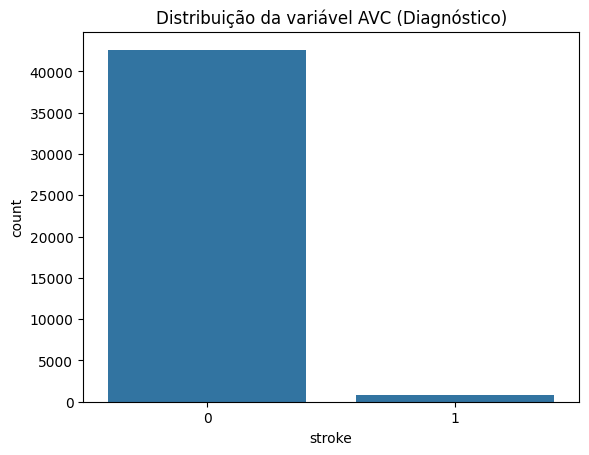

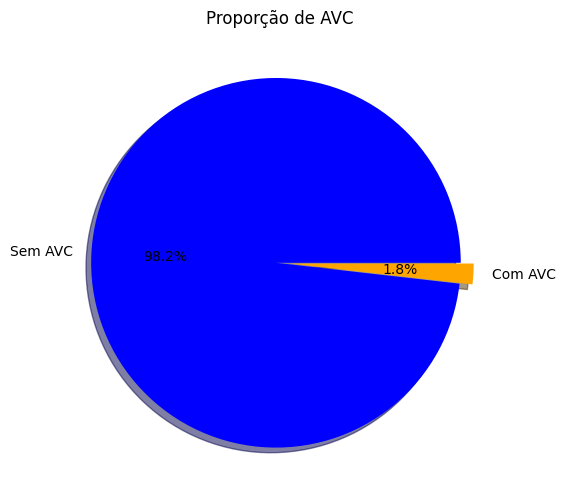

In [12]:
#variacao numerica
avc_count = df['stroke'].value_counts()
print("Distribuição numérica:\n",avc_count)

# exibindo em barras
sns.countplot(x='stroke', data=df)
plt.title('Distribuição da variável AVC (Diagnóstico)')
plt.show()

#exibindo a proporcao em porcentagem
plt.figure(figsize=(6,6))
plt.pie(avc_count.values, labels=['Sem AVC','Com AVC'], autopct='%1.1f%%', explode=(0.02,0.05), shadow=True, colors=['blue','orange'])
plt.title('Proporção de AVC')
plt.show();
